# Assignment 1
Student Name: Vo, Huynh Quang Nguyen

CWID: A20446163

### Problem 1

$$ A = 
\begin{bmatrix}
4  & 3 \\
3  & 1 \\
\end{bmatrix},
\quad
B = \begin{bmatrix}
1/4  & 1/4 \\
1/4 & 1 \\
\end{bmatrix},
\quad
C =
\begin{bmatrix}
5  & 0 \\
0  & 1 \\
\end{bmatrix}
$$

(a) Is $B$ a symmetric matrix?

(b) Is $C$ a diagonal matrix? Write yes or no.

(c) Find the transpose of $A$.

(d) Define the 3 matrices in R and find $A+B+C$. 

***
**Answer:**

(a) $B$ is a symmetric matrix (Yes).

(b) $C$ is diagonal matrix (Yes).

(c) The transpose of $A$ is given as:
$$
[A]_{i,j} = [A]^T_{ji} \rightarrow A^T = \begin{bmatrix} 4 & 3 \\ 3 & 1  \end{bmatrix}
$$
with $i,j$ stand for the $i$-th row and the $j$-th column for $A$, respectively.

(d)

$$
A + B + C = 
\begin{bmatrix}
4 + \frac{1}{4} + 5 & 3 + \frac{1}{4} + 0 \\
3 + \frac{1}{4} + 0 & 1 + 1 + 1\\
\end{bmatrix}
= 
\begin{bmatrix}
\frac{37}{4} & \frac{13}{4} \\
\frac{13}{4} & 3 \\
\end{bmatrix}
$$
Corresponding R-code:

In [1]:
A <- matrix(c(4, 3, 3, 1), nrow = 2, byrow = TRUE)
B <- matrix(c(1/4, 1/4, 1/4, 1), nrow = 2, byrow = TRUE)
C <- matrix(c(5, 0, 0, 1), nrow = 2, byrow = TRUE)

print(B == t(B))
sum_3_matrices <- A + B + C
print(sum_3_matrices)

     [,1] [,2]
[1,] TRUE TRUE
[2,] TRUE TRUE
     [,1] [,2]
[1,] 9.25 3.25
[2,] 3.25 3.00


### Problem 2
A criminologist studying the relationship between the level of education and crime rate in medium-sized U.S counties collected the data given in the file `Crime rate.txt` for a random sample of 84 counties; the second column is the percentage of the individuals in the county having at least a high-school diploma, and the first column is the crime rate (crimes reported per 100,000 residents) last year. The criminologist wants to build a linear model to see if the crime rate depends on the percentage of high school diplomas. 

(a)	Read the data into R using the function `read.table()`. This works exactly like `read.csv()`, but it can read data from files that are not necessarily a csv file. Make sure you use the appropriate value of the header argument (TRUE or FALSE).

(b)	An expert decided that the observations with less 80% rate of high school diploma may not be reliable. So, we will only use the part of the data for which this rate is at least 80%. Use R to find this subset of the data. How many observations does it have? Find the average crime rate from this data set.

(c)	Use this subset of the data to obtain the correlation between crime rate and high school diploma percentage. Also use a hypothesis testing method to test if the correlation is significantly different from zero at 1% level. You must write the null and the alternative hypotheses, justify your reason to accept/reject the null hypothesis at a pre-specified level, and write your final conclusion.

(d)	Use the original data set (not the subset obtained in part (b)) to answer this question and the following questions. Create a scatter plot of the two variables with the crime rate in the Y-axis. Make the points green solid dots and make their size 80% of the default. Put appropriate axis labels. The axis labels should be 75% of the default size. Add an appropriate title. 
Then use the `points()` function to make the data points coming from counties with less 80% high school diploma rate orange. You must include the plot in your answer.

(e)	Find the average crime rate in the counties with less than 80% of a high-school diploma. Find the same average for counties with more than or equal to 80% of high school diplomas.

***
**Answer:**

(a) Corresponding R-code:

In [2]:
dat <- read.table('../datasets/Crime rate.txt', header = TRUE)
head(dat)

Crime,Diplomapct
8487,74
8179,82
8362,81
8220,81
6246,87
9100,66


(b) Corresponding R-code:

In [3]:
new_dat <- subset(dat, Diplomapct >= 80)
dim(new_dat)
mean(new_dat$Crime)

[1] 40  2

[1] 6231.125

There are 40 observations where the rate of highschool diplomas is at least 80%.

The average crime rate of this subset, containing only data points whose diploma rate is at least 80%, is 6231.125.

(c) To conduct a hypothesis test between two variables - crime rate and highschool diploma's rate - do determine whether their correlation is significantly different from zero at 1% level, we first need to determine our null ($H_o$) and alternative ($H_a$) hypothesis as well as our significant level.
* $H_o$: $\rho = 0$.
* $H_1$: $\rho ≠ 0$.
* Significant level: 1%

with the assumption that both variables follow a bivariate normal distribution. Corresponding R-code:



In [4]:
cor(new_dat$Crime, new_dat$Diplomapct)
cor.test(new_dat$Crime, new_dat$Diplomapct, conf.level = 0.95)

[1] -0.3197686


	Pearson's product-moment correlation

data:  new_dat$Crime and new_dat$Diplomapct
t = -2.0804, df = 38, p-value = 0.04428
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.574092144 -0.009173027
sample estimates:
       cor 
-0.3197686 


The correlation coefficient of these variables is approximately -0.3198.

According to results of the t-test, the p-value is 0.4428 that is greater than the significant level (1%). Hence, we fail to reject our null hypothesis ($H_o$).

(d) Corresponding R-code:

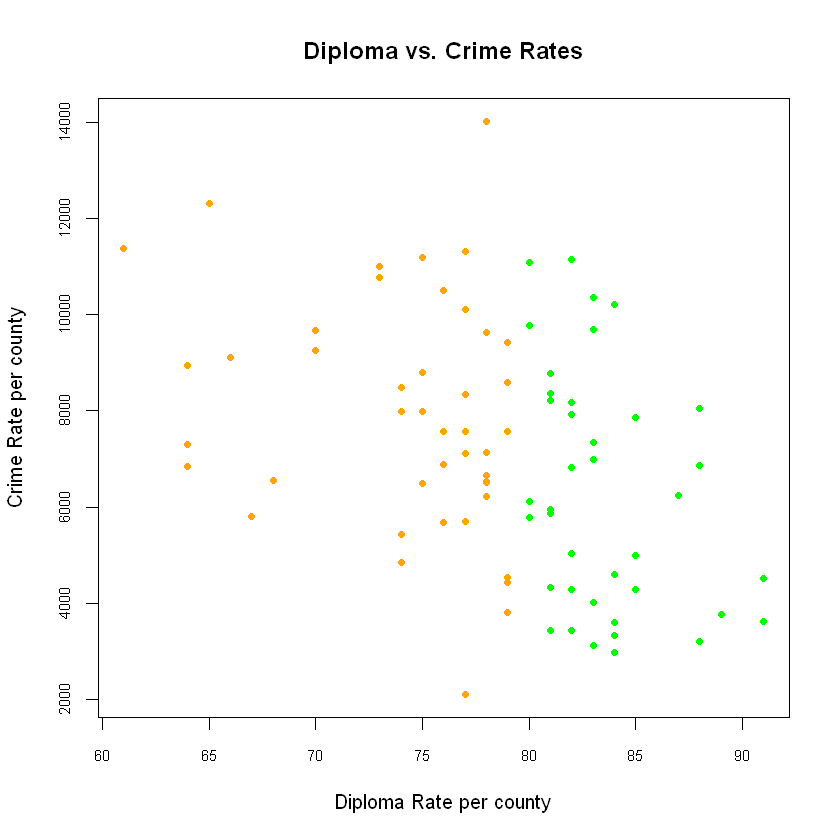

In [5]:
plot(dat$Diplomapct, dat$Crime,
    xlab = "Diploma Rate per county", ylab = "Crime Rate per county", 
    cex.axis = 0.75,
    pch = 16, col = "green", cex = 0.8,
    main = "Diploma vs. Crime Rates")

lessthan80 <- subset(dat, dat$Diplomapct < 80)
points(lessthan80$Diplomapct, lessthan80$Crime, 
    col = "orange", 
    cex = 0.8, 
    pch = 16)

(e) Corresponding R-code:

In [6]:
lessthan80 <- subset(dat, Diplomapct < 80)
mean(lessthan80$Crime)
atleast80 <- subset(dat, Diplomapct >= 80)
mean(atleast80$Crime)

[1] 7911.273

[1] 6231.125

The average crime rate in the counties with a rate of having a high-school diploma less than 80% is approximately 7911.2727.

The average crime rate in the counties with a rate of having a high-school diploma at least 80% is approximately 6231.125

### Problem 3
A contract engineer at DuPont Corp. studied the rate at which a spilled volatile liquid will spread across the surface (Chemical Engineering Progress, January 2005). Assume 50 gallons of methanol spills onto a level surface outdoors. The engineer used derived empirical formulas (assuming a state of turbulent free convection) to calculate the mass (in pounds) of the spill after a period of time ranging from 0 to 60 minutes. You will find the data in the file `LIQUIDSPILL.Rdata`.

(a)	Create an appropriate scatter plot with the time in the horizontal axis and mass in the vertical axis. Use appropriate axis labels. 

(b)	Based on the plot, does it seem like there is a relationship between the two variables? If yes, is it a linear relationship? 

***

**Answer:**

(a) Corresponding R-code:

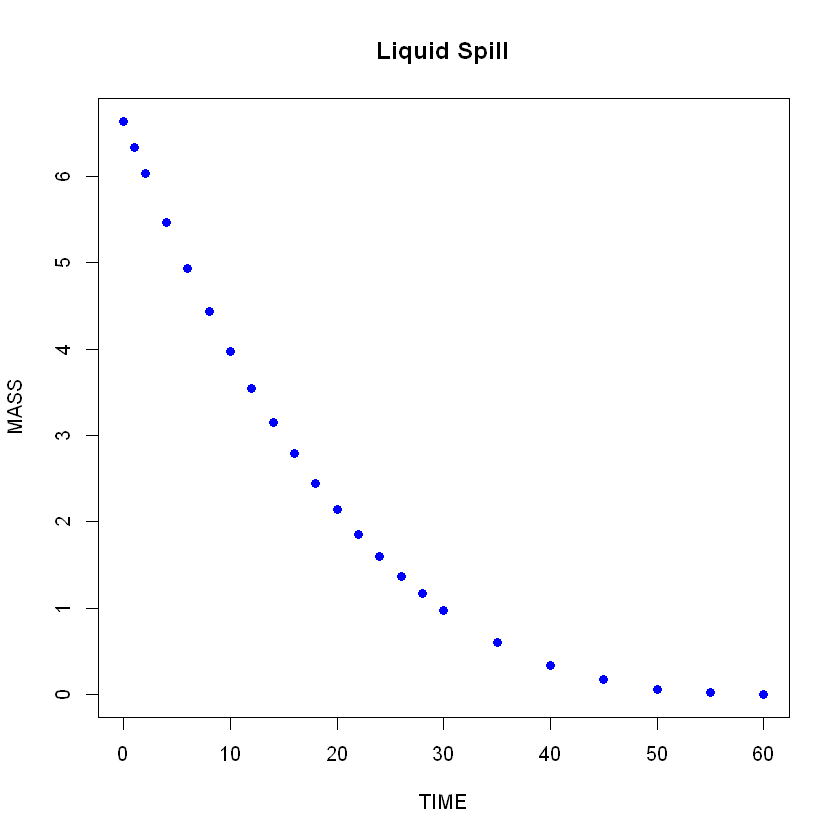

In [7]:
dat <- get(load("../datasets/LIQUIDSPILL.Rdata"))
plot(dat$TIME, dat$MASS,
    main = "Liquid Spill",
    xlab = "TIME", ylab = "MASS",
    pch = 16, col = "blue", cex = 1.0)

(b) Based on the plot, there is a relationship between these two varialbes, and this relationship is non-linear. Noted that the Pearson correlation efficient computed for these two variables yields an interesting result: approximately -0.924, which indicates a strong negative linear correlation.

In [8]:
cor(dat$TIME, dat$MASS)


[1] -0.9237634